In [ ]:
# prompt: write code to connect google drivee to google colab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)
Reshaped Training Set (73257, 32, 32, 3) (73257, 1)
Reshaped Test Set (26032, 32, 32, 3) (26032, 1)
Training Set (58605, 32, 32, 3) (58605, 10)
Validation Set (14652, 32, 32, 3) (14652, 10)
Test Set (26032, 32, 32, 3) (26032, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 112s 119ms/step - accuracy: 0.3726 - loss: 1.7843 - val_accuracy: 0.8367 - val_loss: 0.5838
Epoch 2/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 106s 115ms/step - accuracy: 0.8070 - loss: 0.6549 - val_accuracy: 0.8668 - val_loss: 0.4425
Epoch 3/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 136s 109ms/step - accuracy: 0.8492 - loss: 0.5196 - val_accuracy: 0.8809 - val_loss: 0.4019
Epoch 4/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 141s 109ms/step - accuracy: 0.8674 - loss: 0.4445 - val_accuracy: 0.8858 - val_loss: 0.3833
Epoch 5/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 140s 106ms/step - accuracy: 0.8768 - loss: 0.4160 - val_accuracy: 0.8941 - val_loss: 0.3628
Epoch 6/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 145s 109ms/step - accuracy: 0.8865 - loss: 0.3807 - val_accuracy: 0.8963 - val_loss: 0.3531
Epoch 7/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 139s 106ms/step - accuracy: 0.8945 - loss: 0.3622 - val_accuracy: 0.8960 - val_loss: 0.3543
Epoch 8/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 145s 109ms/step - accuracy: 0.8986 -

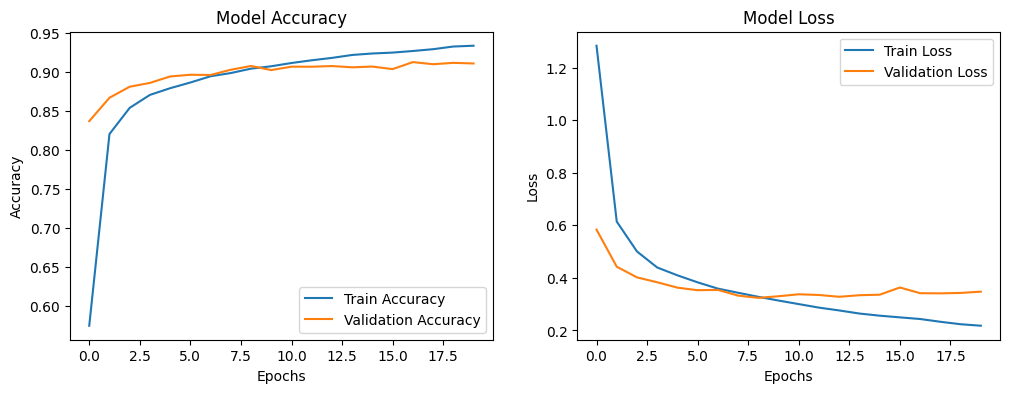

In [ ]:
# Install necessary libraries
!pip install mat73

import mat73
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dataset_path = '/content/train_32x32.mat'
test_dataset_path = '/content/test_32x32.mat'

# Load data function
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)  # Since the original dataset isn't using mat73 but loadmat
    return data['X'], data['y']

# Load training and test data
X_train, y_train = load_data(train_dataset_path)
X_test, y_test = load_data(test_dataset_path)

# Inspect the shape
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

# Transpose the dataset: (width, height, channels, samples) -> (samples, width, height, channels)
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

print("Reshaped Training Set", X_train.shape, y_train.shape)
print("Reshaped Test Set", X_test.shape, y_test.shape)

# Normalize the image data (from 0-255 to 0-1)
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/ 255.0

# Handle label 10 (which represents '0') as 0 for classification
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Set", X_train.shape, y_train.shape)
print("Validation Set", X_val.shape, y_val.shape)
print("Test Set", X_test.shape, y_test.shape)

### Building the CNN Model
def build_model():
    model = Sequential()

    # First convolution layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolution layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolution layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (10 digits, softmax activation for classification)
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the model
model = build_model()

# Print model summary
model.summary()

### Training the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

### Evaluating the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

### Plotting Training History
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

814/814 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step


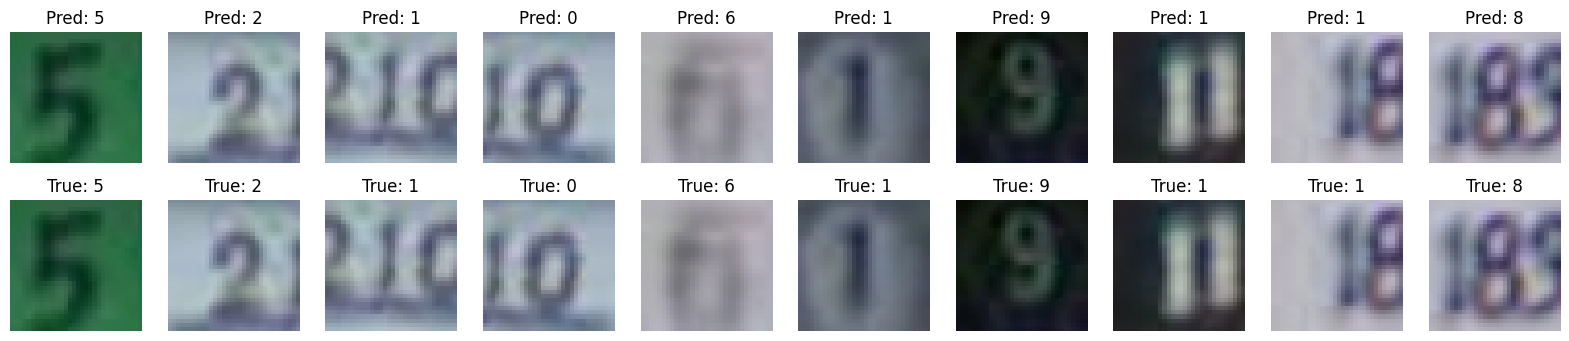

In [ ]:
# prompt: write ccode to show pridicted and truce  image s

import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Function to display predicted and true images side by side
def display_predictions(X_test, y_pred_classes, y_true_classes, num_images=10):
  """
  Displays predicted and true images side by side.

  Args:
    X_test: The test data.
    y_pred_classes: Predicted classes.
    y_true_classes: True classes.
    num_images: Number of images to display.
  """
  plt.figure(figsize=(20, 4))
  for i in range(num_images):
      plt.subplot(2, num_images, i + 1)
      plt.imshow(X_test[i])
      plt.title(f"Pred: {y_pred_classes[i]}")
      plt.axis('off')

      plt.subplot(2, num_images, i + 1 + num_images)
      plt.imshow(X_test[i])
      plt.title(f"True: {y_true_classes[i]}")
      plt.axis('off')

  plt.show()


# Display predictions for a few images
display_predictions(X_test, y_pred_classes, y_true_classes)


In [ ]:
# prompt: write code save the model and load

model.save('my_model.h5')

from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.h5')

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f'Loaded model test accuracy: {test_acc * 100:.2f}%')


814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9019 - loss: 0.4077
Loaded model test accuracy: 90.53%


In [ ]:
# prompt: write a code  to make user interface  the user will  give an image and base on the train model it will predict what  number is in the picture

from google.colab import files
from PIL import Image
import io
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/svhn_cnn_model.h5')

def preprocess_image(image_path):
  """
  Preprocesses the uploaded image for prediction.

  Args:
    image_path: Path to the uploaded image.

  Returns:
    Preprocessed image as a NumPy array.
  """
  try:
    img = Image.open(image_path).convert('RGB')
    img = img.resize((32, 32))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
  except Exception as e:
    print(f"Error processing image: {e}")
    return None


def predict_digit(image_array):
  """
  Predicts the digit in the uploaded image using the loaded model.

  Args:
    image_array: Preprocessed image as a NumPy array.

  Returns:
    Predicted digit (0-9).
  """
  if image_array is not None:
    prediction = loaded_model.predict(image_array)
    predicted_class = np.argmax(prediction)
    return predicted_class
  else:
    return None


# Upload an image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Preprocess the uploaded image
  image_array = preprocess_image(io.BytesIO(uploaded[fn]))

  # Predict the digit
  predicted_digit = predict_digit(image_array)

  if predicted_digit is not None:
    print(f"The predicted digit is: {predicted_digit}")
  else:
    print("Could not predict the digit.")


Saving IMG-20221021-WA0060.jpg to IMG-20221021-WA0060.jpg
User uploaded file "IMG-20221021-WA0060.jpg" with length 457834 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
The predicted digit is: 5
